# Airbnb Data Analysis Project

# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max.rows',200)
pd.set_option('display.max.columns',200)

# Importing all 3 dataset

In [4]:
df_Calender = pd.read_excel(r'E:\Study\Airbnb project\Airbnb - Calender.xlsx')

# EDA on Calender Data set

In [5]:
df_Calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
df_Calender['available'].replace({'t': 'Yes', 'f': 'No'},inplace=True)

In [7]:
df_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1048575 non-null  int64         
 1   date        1048575 non-null  datetime64[ns]
 2   available   1048575 non-null  object        
 3   price       699862 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.0+ MB


In [8]:
df_Calender.shape

(1048575, 4)

In [9]:
df_Calender.nunique()

listing_id    2873
date           365
available        2
price          641
dtype: int64

In [10]:
df_Calender.isnull().sum()

listing_id         0
date               0
available          0
price         348713
dtype: int64

<Axes: >

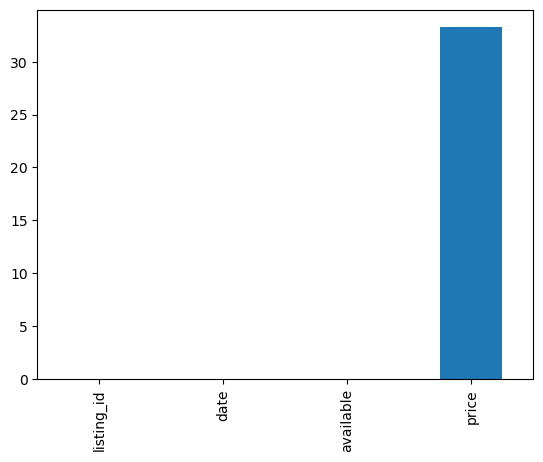

In [11]:
df_missing = df_Calender.isnull().mean()*100
df_missing.plot.bar()

In [12]:
df_Calender.fillna('0',inplace=True)

In [13]:
df_Calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,Yes,85.0
1,241032,2016-01-05,Yes,85.0
2,241032,2016-01-06,No,0
3,241032,2016-01-07,No,0
4,241032,2016-01-08,No,0


# EDA on Reviews Dataset

In [14]:
import numpy as np

In [15]:
df_Reviews = pd.read_excel(r'E:\Study\Airbnb project\Airbnb - Reviews.xlsx')

In [16]:
df_Reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [17]:
df_Reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         19
dtype: int64

In [18]:
df_Reviews.fillna('abc',inplace=True)

In [19]:
# df_Reviews[df_Reviews['comments'].str.contains('good').isna()]

In [20]:
A = ['perfect','good','cute','great','welcoming','loved','super','nice','beautiful','awesome','amazing','excellent','home','cozy','lovely','wonderful','everything','downtown']
B = ['average','comfortable','clean','helpful','reservation','friendly','experience','location','quite','enjoy','feel','space']
C = ['poor','bad','need','canceled']

In [21]:
for x in A:
    df_Reviews.loc[df_Reviews['comments'].str.lower().str.contains(x),'Rating']=10
    
for x in B:
    df_Reviews.loc[(df_Reviews['comments'].str.lower().str.contains(x) & df_Reviews.Rating.isna()), 'Rating']=5
    
for x in C:
    df_Reviews.loc[df_Reviews['comments'].str.lower().str.contains(x) & df_Reviews.Rating.isna(),'Rating']=1

In [22]:
df_Reviews.Rating.isna().sum()

1563

In [23]:
df_Reviews[df_Reviews.Rating.isna()].index

Index([   74,    80,   213,   288,   291,   301,   404,   494,   527,   537,
       ...
       84042, 84071, 84117, 84121, 84250, 84314, 84345, 84370, 84664, 84846],
      dtype='int64', length=1563)

In [24]:
df_Reviews.drop(df_Reviews[df_Reviews.Rating.isna()].index,inplace=True)

In [25]:
df_Reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,Rating
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,10.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,10.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",10.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,10.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,10.0
...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Michael,Comfortability upon arrival and everything wit...,10.0
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,10.0
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,10.0
84847,3624990,52814482,2015-11-02,24445024,JÃ¸rgen,"Very good apartement, clean and well sized. Si...",10.0


In [26]:
# df_Reviews[df_Reviews.Rating.isna()]['comments'].to_csv('E:\Study\Airbnb project\comments.csv')

# EDA on Listing Dataset

In [27]:
df_Listing = pd.read_excel(r'E:\Study\Airbnb project\Airbnb - Listing.xlsx')

In [28]:
df_Listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,0.96,1.0,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85,NaN,NaN,NaN,NaN,2,5,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,0.98,1.0,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150,1000.0,3000.0,100.0,40.0,1,0,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house

In [29]:
df_Listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   datetime64[ns]
 4   name                              3818 non-null   object        
 5   summary                           3639 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2206 non-null 

In [30]:
df_Listing.nunique()

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
summary                             3476
space                               3119
description                         3742
experiences_offered                    1
neighborhood_overview               2506
notes                               1993
transit                             2573
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_id                             2751
host_url                            2751
host_name                           1466
host_since                          1380
host_location                        120
host_about                          2011
host_response_time                     4
host_response_rate                    45
host_acceptance_

In [31]:
df_Listing.shape

(3818, 92)

In [32]:
df_Listing.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              179
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1612
transit                              935
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [33]:
df_Listing.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.422211
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244893
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_checkin               0.172342
review_scores_accuracy              0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
last_review                         0.164222
reviews_per_month                   0.164222
first_review                        0.164222
space                               0.149031
host_respo

<Axes: >

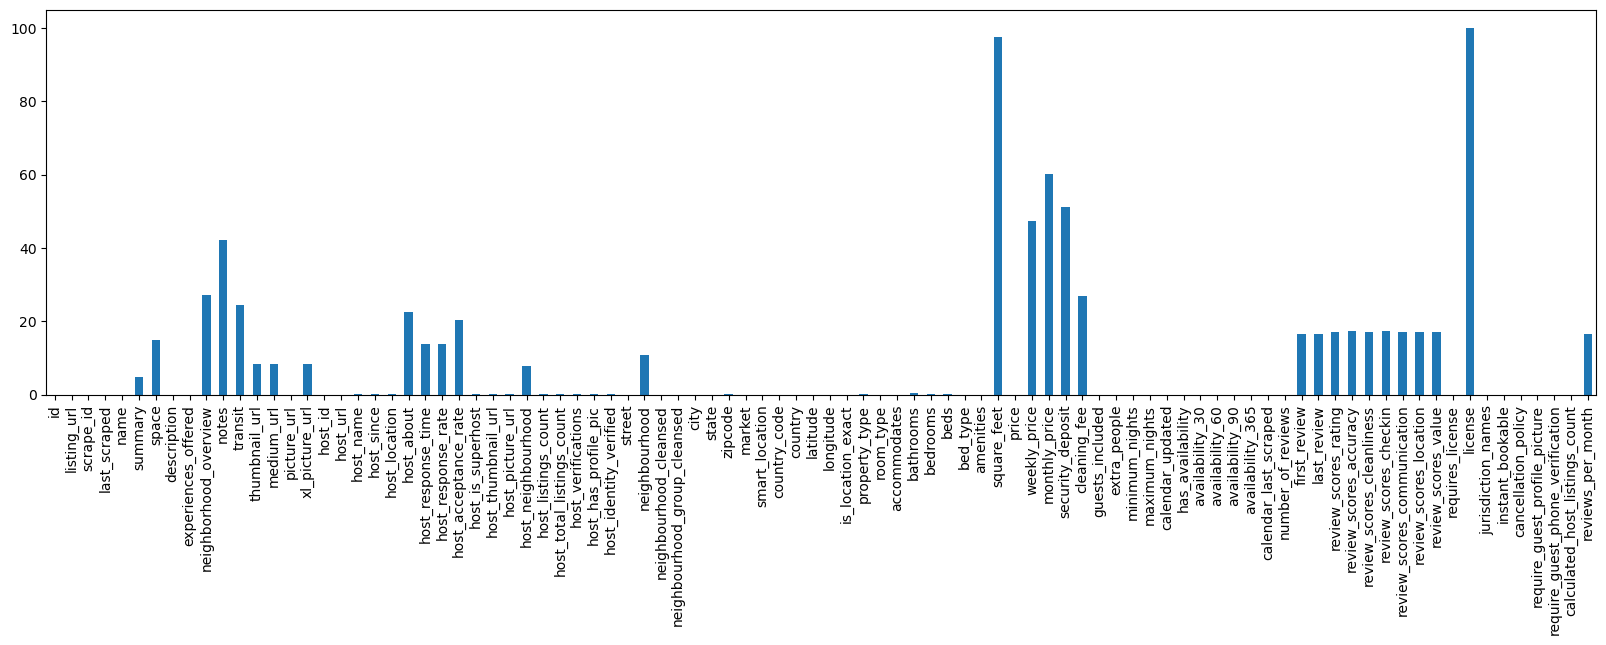

In [34]:
df_missing = df_Listing.isnull().mean()*100
df_missing.plot.bar(figsize=(20,5))